In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
class_1 = np.random.random(20)*2 + 1
class_2 = np.random.random(20)*2 - 0.5
print(class_1)
print(class_2)

[2.01679909 1.1867714  1.19420473 1.77385374 1.05946199 2.66777925
 2.41065778 1.1554291  1.14714377 1.7359655  2.87950188 2.36944359
 2.18128517 2.17161614 1.65503978 1.43137308 1.77650699 1.33196805
 1.45121735 2.82340953]
[ 0.7572009   0.67048543  0.66511101 -0.04398538  0.68662827  0.7773173
  1.23125347  1.17130075 -0.25418421  0.74969714  1.43998523  0.00923509
  0.9649781   1.05427342  0.15265711  1.02001663  1.07945531  0.70600171
  1.33315806  0.97842494]


In [3]:
data = pd.DataFrame()
data['x'] = np.concatenate([class_1, class_2])
data['y'] = [0]*20 + [1]*20
data = data.sample(frac=1)

In [4]:
data.head()

,x,y
8,1.147144,0
26,1.231253,1
37,0.706002,1
21,0.670485,1
33,1.054273,1


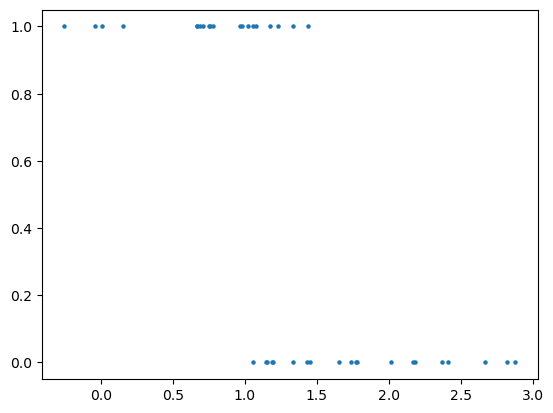

In [5]:
plt.scatter(data.x, data.y, s=5)

In [6]:
def calculate_gradient_log_likelihood(curr_betas, data):
    numerator = np.exp(curr_betas[0] + curr_betas[1]*data.x)
    p = numerator / (1+numerator)
    
    # Calculate partials
    partial_0 = np.sum(data.y - p)
    partial_1 = np.sum((data.y - p)*data.x)
    
    return np.array([partial_0, partial_1])

In [7]:
curr_betas = np.array([0.0, 0.0])
diff = np.inf
eta = 0.1

while diff > 0.001:
    grad = calculate_gradient_log_likelihood(curr_betas, data)
    diff = abs(grad).sum()
    curr_betas += eta*grad
    
print(curr_betas)

[ 8.4263996  -6.95349825]


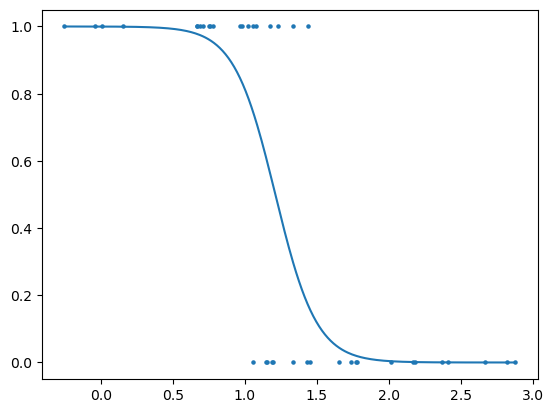

In [10]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), .01)
p_vals = 1 / (1+ np.exp(-(curr_betas[0] + curr_betas[1]*x_vals)))
plt.plot(x_vals, p_vals)

In [12]:
clf = LogisticRegression(penalty='none')
clf.fit(np.array(data.x).reshape(-1,1), data.y)
print('beta_0: %s'%clf.intercept_[0])
print('beta_1: %s'%clf.coef_[0][0])

beta_0: 8.435241880068448
beta_1: -6.9608845207584835


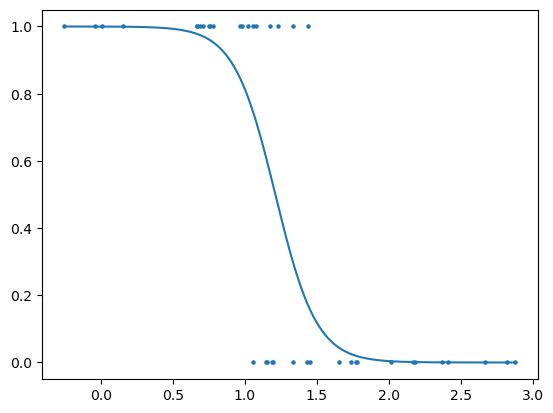

In [13]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), .01)
p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))
plt.plot(x_vals, p_vals)